In [1]:
import pandas as pd
import torch

In [2]:
df = pd.read_csv('통영.csv', encoding='cp949')
df

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,22188,2015-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,0.0,NaN,8.0
1,22188,2015-11-18,13.8,1017.7,85.0,15.4,17.5,4.9,3.0,4.9,7.2,7.4,9.1
2,22188,2015-11-19,8.7,1021.9,77.0,15.4,17.4,3.3,2.0,3.7,6.2,8.1,9.1
3,22188,2015-11-20,3.0,1022.5,77.0,15.7,17.3,1.4,0.8,1.2,2.3,6.5,7.1
4,22188,2015-11-21,6.1,1025.1,79.0,16.1,17.3,1.1,0.7,0.8,1.4,4.4,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524,22188,2022-12-27,5.3,1026.7,53.0,6.6,13.7,1.3,0.9,1.0,1.7,4.2,4.7
2525,22188,2022-12-28,7.8,1028.5,60.0,5.7,13.2,1.5,0.9,1.3,2.1,3.7,3.9
2526,22188,2022-12-29,5.7,1031.3,56.0,4.8,13.2,1.2,0.8,1.1,1.8,3.6,4.1
2527,22188,2022-12-30,7.4,1031.2,57.0,5.5,13.4,1.2,0.8,1.0,1.6,3.5,3.7


In [3]:
df = df.rename(columns={'일시': 'date', '평균기압(hPa)': 'Apress(hPa)', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)', '평균 상대습도(%)': 'Moisture(%)'})
df=df.set_index(pd.to_datetime(df.date)) # Date를 인덱스로
df=df[['Apress(hPa)','Atemp(°C)','Stemp(°C)','Moisture(%)']] # Column 재정리
df

,Apress(hPa),Atemp(°C),Stemp(°C),Moisture(%)
date,,,,
2015-11-01,NaN,NaN,NaN,NaN
2015-11-18,1017.7,15.4,17.5,85.0
2015-11-19,1021.9,15.4,17.4,77.0
2015-11-20,1022.5,15.7,17.3,77.0
2015-11-21,1025.1,16.1,17.3,79.0
...,...,...,...,...
2022-12-27,1026.7,6.6,13.7,53.0
2022-12-28,1028.5,5.7,13.2,60.0
2022-12-29,1031.3,4.8,13.2,56.0


In [4]:
import numpy as np

df = df[['Stemp(°C)']]

df.loc[df['Stemp(°C)'] == 0, 'Stemp(°C)'] = np.nan

df = df.dropna()
df

C:\Users\admin\AppData\Local\Temp\ipykernel_2352\2087265369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Stemp(°C)'] == 0, 'Stemp(°C)'] = np.nan


,Stemp(°C)
date,
2015-11-18,17.5
2015-11-19,17.4
2015-11-20,17.3
2015-11-21,17.3
2015-11-22,17.5
...,...
2022-12-27,13.7
2022-12-28,13.2
2022-12-29,13.2


In [5]:
monthly_avg_temp = df['Stemp(°C)'].resample('M').mean()
monthly_avg_temp

date
2015-11-30    17.400000
2015-12-31    14.880000
2016-01-31    12.270968
2016-02-29    11.117241
2016-03-31    12.929032
                ...    
2022-08-31    25.419355
2022-09-30    25.080000
2022-10-31    21.551613
2022-11-30    18.770000
2022-12-31    15.158065
Freq: M, Name: Stemp(°C), Length: 86, dtype: float64

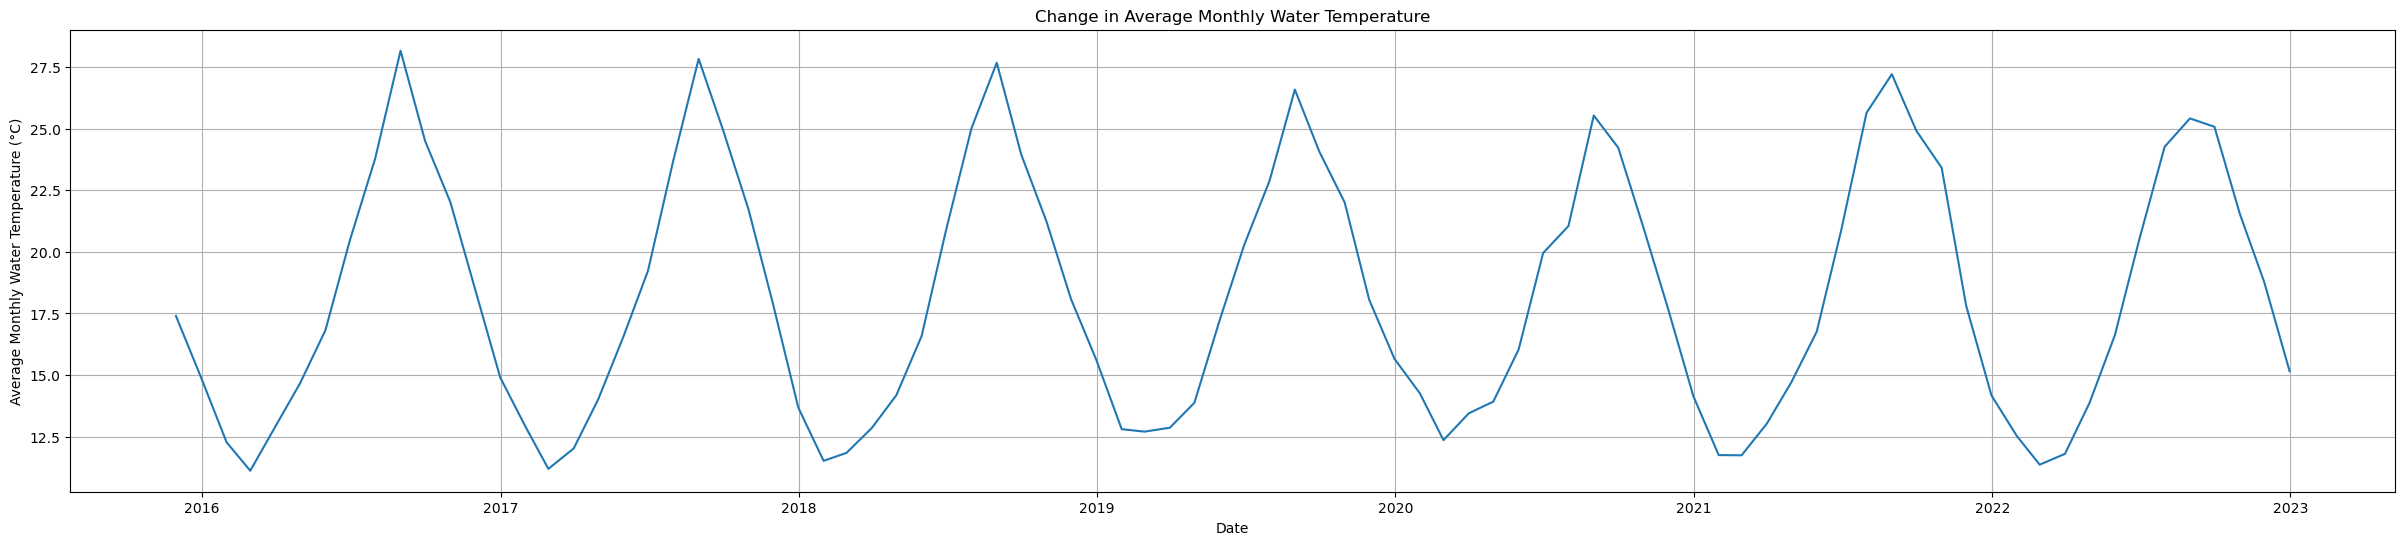

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(monthly_avg_temp)
plt.xlabel('Date')
plt.ylabel('Average Monthly Water Temperature (°C)')
plt.title('Change in Average Monthly Water Temperature')
plt.grid(True)
plt.show()

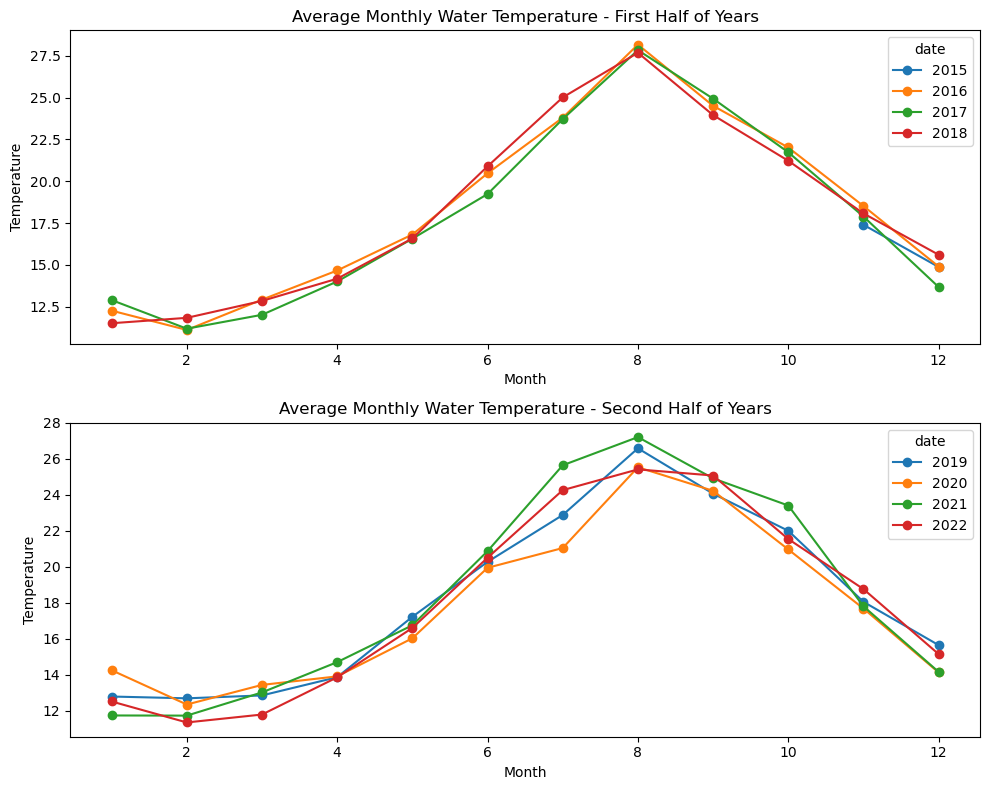

In [7]:
import matplotlib.pyplot as plt

# Group by year and month, and calculate the average temperature
yearly_monthly_avg = df.groupby([df.index.year, df.index.month])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and months as rows
yearly_monthly_avg = yearly_monthly_avg.unstack(level=0)

# Calculate the total number of years
num_years = yearly_monthly_avg.shape[1]

# Calculate the midpoint to divide the years into two groups
midpoint = num_years // 2

# Split the years into two groups
first_half_years = yearly_monthly_avg.iloc[:, :midpoint]
second_half_years = yearly_monthly_avg.iloc[:, midpoint:]

# Create two separate plots for the two groups of years
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the first half of the years
first_half_years.plot(marker='o', linestyle='-', ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Temperature')
axes[0].set_title('Average Monthly Water Temperature - First Half of Years')

# Plot the second half of the years
second_half_years.plot(marker='o', linestyle='-', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Average Monthly Water Temperature - Second Half of Years')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


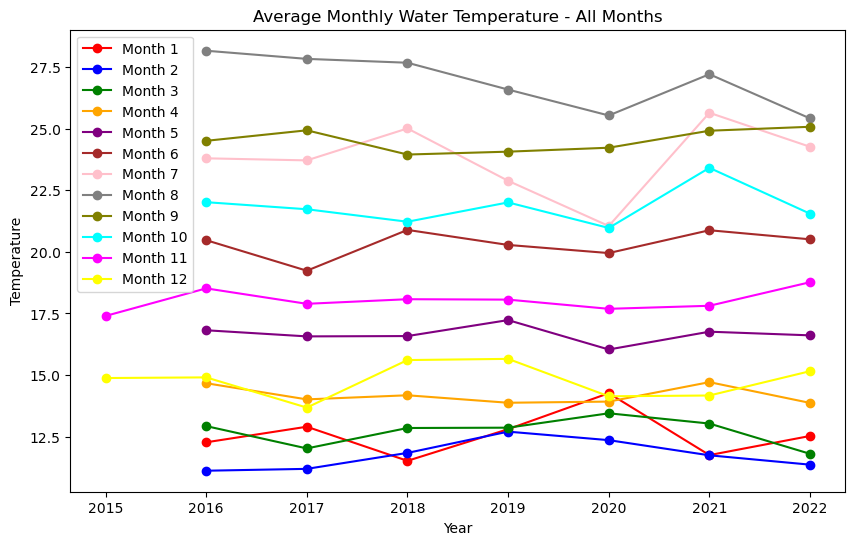

In [8]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


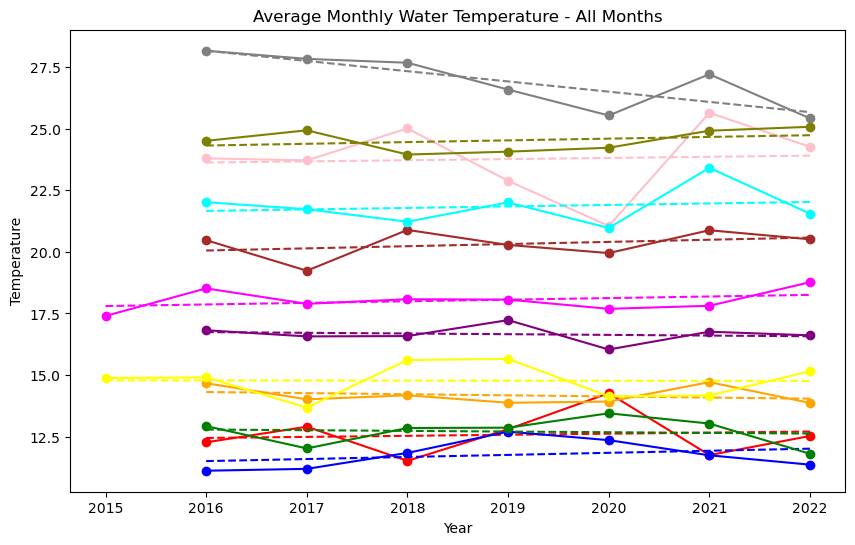

In [9]:

from sklearn.linear_model import LinearRegression

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the linear regression line
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='--')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Display the plot
plt.show()


Order of trends by prominence:
1. Month 6 - Slope: 0.08754578754578736
2. Month 2 - Slope: 0.0841296248283546
3. Month 9 - Slope: 0.06976190476190525
4. Month 11 - Slope: 0.06464285714285735
5. Month 10 - Slope: 0.06088113777212735
6. Month 7 - Slope: 0.04665898617511514
7. Month 1 - Slope: 0.04334418202764978
8. Month 12 - Slope: -0.0036712749615976747
9. Month 3 - Slope: -0.027188940092165898
10. Month 5 - Slope: -0.027995391705069414
11. Month 4 - Slope: -0.04488095238095216
12. Month 8 - Slope: -0.4154685099846392


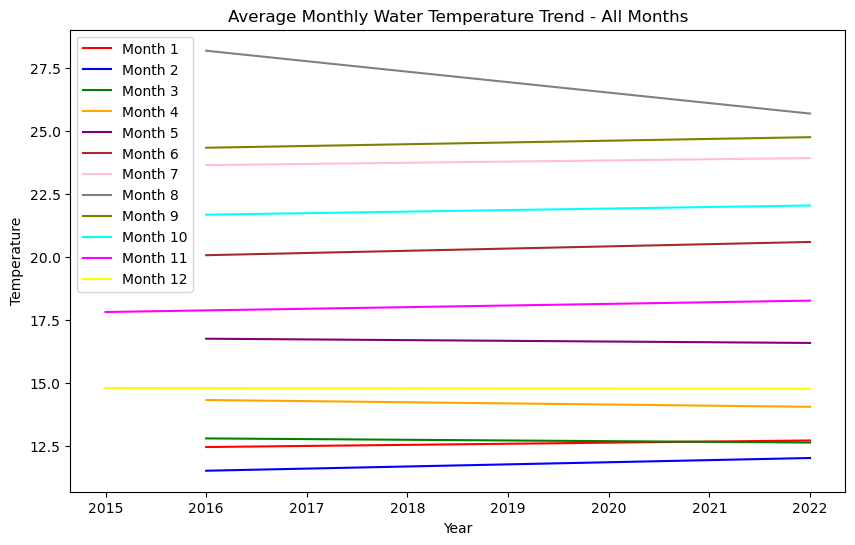

In [10]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store the slopes
slopes = {}

# Loop through each month and plot the average monthly water temperature trend
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the average monthly water temperature trend with a different color
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='-', label=f'Month {month}')
    
    # Calculate the slope of the trend line
    slope = reg.coef_[0][0]
    slopes[month] = slope

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (month, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. Month {month} - Slope: {slope}")

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature Trend - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


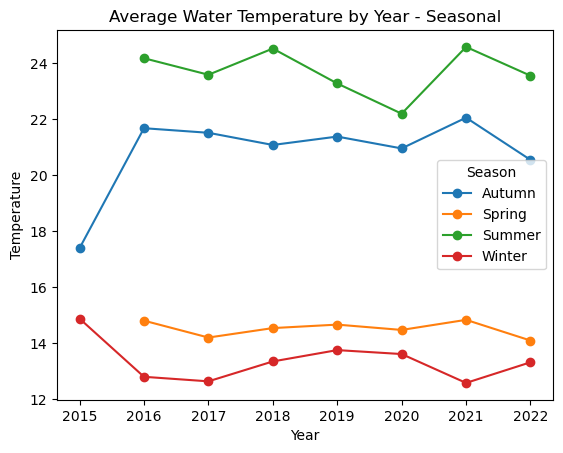

In [11]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')
plt.show()

In [15]:
df = pd.read_csv('통영.csv', encoding='cp949')

df = df.rename(columns={'일시': 'date', '평균기압(hPa)': 'Apress(hPa)', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)', '평균 상대습도(%)': 'Moisture(%)'})
df=df.set_index(pd.to_datetime(df.date)) # Date를 인덱스로
df=df[['Apress(hPa)','Atemp(°C)','Stemp(°C)','Moisture(%)']] # Column 재정리
df

,Apress(hPa),Atemp(°C),Stemp(°C),Moisture(%)
date,,,,
2015-11-01,NaN,NaN,NaN,NaN
2015-11-18,1017.7,15.4,17.5,85.0
2015-11-19,1021.9,15.4,17.4,77.0
2015-11-20,1022.5,15.7,17.3,77.0
2015-11-21,1025.1,16.1,17.3,79.0
...,...,...,...,...
2022-12-27,1026.7,6.6,13.7,53.0
2022-12-28,1028.5,5.7,13.2,60.0
2022-12-29,1031.3,4.8,13.2,56.0


In [16]:
correlations = df.corr()['Stemp(°C)']

for column, correlation in correlations.items():
    if column != 'Stemp(°C)':
        print(f"Correlation between Stemp(°C) and {column}: {correlation}")


Correlation between Stemp(°C) and Apress(hPa): -0.591842094577538
Correlation between Stemp(°C) and Atemp(°C): 0.919977556193916
Correlation between Stemp(°C) and Moisture(%): 0.5161286280977144


In [17]:
df = pd.read_csv('통영.csv', encoding='cp949')

df = df.rename(columns={'일시': 'date', '평균기압(hPa)': 'Apress(hPa)', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)', '평균 상대습도(%)': 'Moisture(%)'})
df=df.set_index(pd.to_datetime(df.date)) # Date를 인덱스로
df=df[['Apress(hPa)','Atemp(°C)','Stemp(°C)','Moisture(%)']] # Column 재정리
df.dropna(inplace=True)
df

,Apress(hPa),Atemp(°C),Stemp(°C),Moisture(%)
date,,,,
2015-11-18,1017.7,15.4,17.5,85.0
2015-11-19,1021.9,15.4,17.4,77.0
2015-11-20,1022.5,15.7,17.3,77.0
2015-11-21,1025.1,16.1,17.3,79.0
2015-11-22,1026.0,16.1,17.5,83.0
...,...,...,...,...
2022-12-27,1026.7,6.6,13.7,53.0
2022-12-28,1028.5,5.7,13.2,60.0
2022-12-29,1031.3,4.8,13.2,56.0


In [18]:
correlations = df.corr()['Stemp(°C)']

for column, correlation in correlations.items():
    if column != 'Stemp(°C)':
        print(f"Correlation between Stemp(°C) and {column}: {correlation}")

Correlation between Stemp(°C) and Apress(hPa): -0.5849112870234718
Correlation between Stemp(°C) and Atemp(°C): 0.9189551644355797
Correlation between Stemp(°C) and Moisture(%): 0.5161286280977144


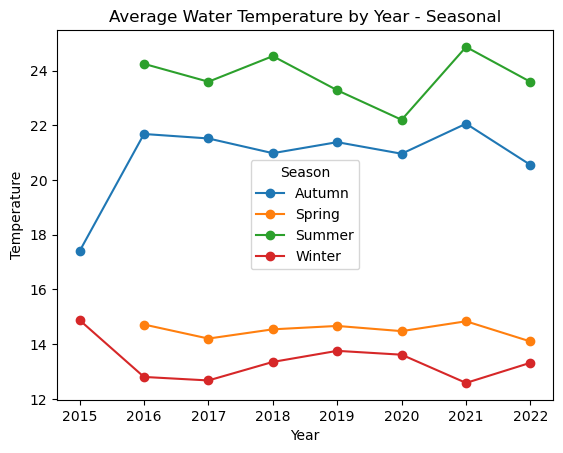

In [20]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')
plt.show()